# Training Models

In  this  chapter  we  will  start  by  looking  at  the  Linear  Regression  model,  one  of  the simplest models there is. We will discuss two very different ways to train it:

- Using a direct “closed-form” equation that directly computes the model parameters  that  best  fit  the  model  to  the  training  set  (i.e.,  the  model  parameters  that minimize the cost function over the training set).

- Using  an  iterative  optimization  approach  called  Gradient  Descent  (GD)  that gradually  tweaks  the  model  parameters  to  minimize  the  cost  function  over  thetraining  set,  eventually  converging  to  the  same  set  of  parameters  as  the  firstmethod. We will look at a few variants of Gradient Descent that we will use againand again when we study neural networks: Batch GD, Mini-batch GD,and Stochastic GD.

Next we will look at Polynomial Regression, a more complex model that can fit non‐linear  datasets.  Since  this  model  has  more  parameters  than  Linear  Regression,  it  is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set. Finally,  we  will  look  at  two  more  models  that  are  commonly  used  for  classification tasks: 

- Logistic Regression and 
- Softmax Regression.

## Linear Regression



The general linera regression eqn can be represented as:

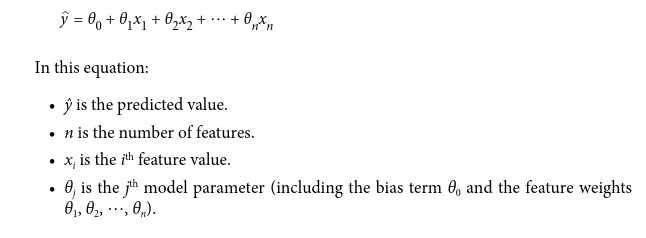

Representing in vectorized form:

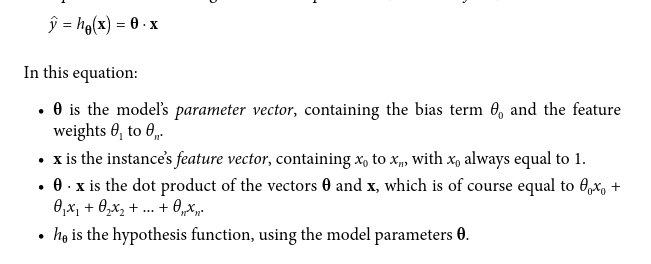

For error calculation we generally Mean Squared Error, mathematically:

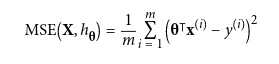

To  simplify  notations,  we  will  just  write  MSE(θ) instead of MSE(X, hθ).

### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Normal Equation:

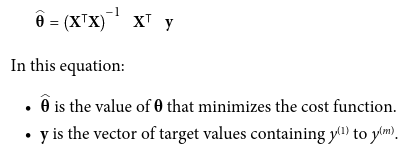

Let’s generate some linear-looking data.

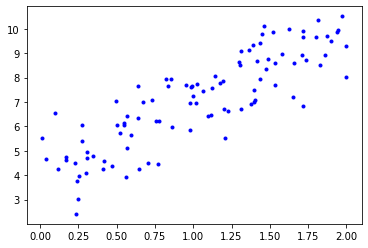

In [31]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.show()

Now let’s compute θ using the Normal Equation. We will use the *inv()* function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, andthe *dot()* method for matrix multiplication. **!!! θ-cap is represented as θ**

In [32]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The  function  that  we  used  to  generate  the  data  is  y  =  4  +  3x1  +  Gaussian  noise.  Let’s see what the equation found:

In [33]:
theta_best

array([[4.06997382],
       [2.9007864 ]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.069 and θ1 = 2.900. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now, we can make predictions using θ.

In [35]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06997382],
       [9.87154661]])

Let's plot the model's predictions.

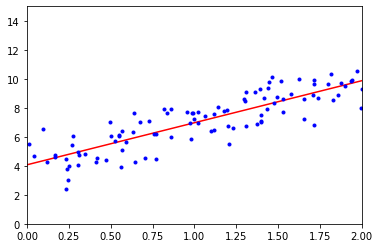

In [44]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple too.

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.06997382]), array([[2.9007864]]))

The  *LinearRegression*  class  is  based  on  the  *scipy.linalg.lstsq()*  function  (the name stands for “least squares”), which we could call directly.|

In [50]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06997382],
       [2.9007864 ]])

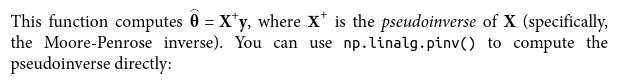

In [51]:
np.linalg.pinv(X_b).dot(y)

array([[4.06997382],
       [2.9007864 ]])

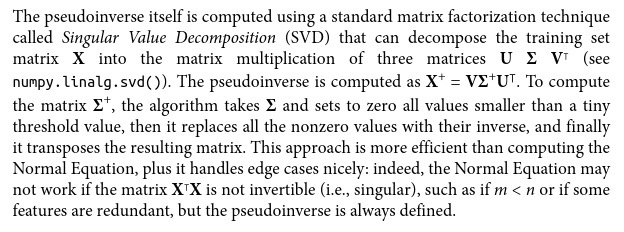

### Computational Complexity

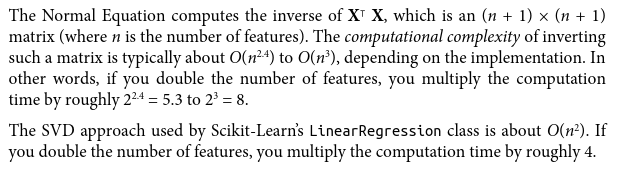

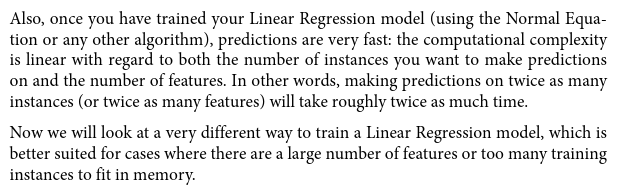

### Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions  to  a  wide  range  of  problems.  The  general  idea  of  Gradient  Descent  is  to  tweakparameters iteratively in order to minimize a cost function.